# Gaussian Naive Bayes Classification Notebook

This notebook demonstrates Gaussian Naive Bayes with and without PCA, including evaluation and cross-validation.

## 1. Import Required Libraries

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)

def load_preprocessed_data(input_file='preprocessed_data.pkl'):

    print(f"Loading preprocessed data from {input_file}...")
    
    with open(input_file, 'rb') as f:
        data = pickle.load(f)
    
    X_train = data['X_train']
    X_test = data['X_test']
    y_train = data['y_train']
    y_test = data['y_test']
    
    print("Preprocessed data loaded successfully!")
    print(f"Training set: {X_train.shape[0]} samples")
    print(f"Testing set: {X_test.shape[0]} samples")
    
    return X_train, X_test, y_train, y_test


def print_data_statistics(X_train, y_train, X_test, y_test):

    print("\nDATASET STATISTICS")
    print("-"*40)
    print(f"Total Samples: {len(X_train) + len(X_test)}")
    print(f"Training Samples: {len(X_train)}")
    print(f"Test Samples: {len(X_test)}")
    print(f"Features: {X_train.shape[1]}")
    print(f"Number of Classes: {len(np.unique(y_train))}")
    print(f"\nTraining Set Distribution: {np.bincount(y_train)}")
    print(f"Test Set Distribution: {np.bincount(y_test)}")
    print(f"\nPixel Value Mean: {np.mean(X_train):.4f}")
    print(f"Pixel Value Std: {np.std(X_train):.4f}")
    print("-"*40)

X_train, X_test, y_train, y_test = load_preprocessed_data()


print_data_statistics(X_train, y_train, X_test, y_test)

Matplotlib is building the font cache; this may take a moment.


Loading preprocessed data from preprocessed_data.pkl...
Preprocessed data loaded successfully!
Training set: 8000 samples
Testing set: 2000 samples

DATASET STATISTICS
----------------------------------------
Total Samples: 10000
Training Samples: 8000
Test Samples: 2000
Features: 784
Number of Classes: 10

Training Set Distribution: [800 800 800 800 800 800 800 800 800 800]
Test Set Distribution: [200 200 200 200 200 200 200 200 200 200]

Pixel Value Mean: 0.4261
Pixel Value Std: 0.1662
----------------------------------------


## 2. Gaussian Naive Bayes (Without PCA)

In [3]:

# Load Model
nb_G_model = GaussianNB()

# Fit Model
nb_G_model.fit(X_train, y_train)


,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


### Prediction

In [4]:

y_train_pred = nb_G_model.predict(X_train)
y_test_pred  = nb_G_model.predict(X_test)


### Accuracy Evaluation

In [5]:

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy  = accuracy_score(y_test, y_test_pred)

print("Accuracy:\n")
print(f"Train Accuracy: {train_accuracy*100:.2f}%")
print(f"Test  Accuracy: {test_accuracy*100:.2f}%")


Accuracy:

Train Accuracy: 52.68%
Test  Accuracy: 51.15%


## 3. Evaluation (Without PCA)

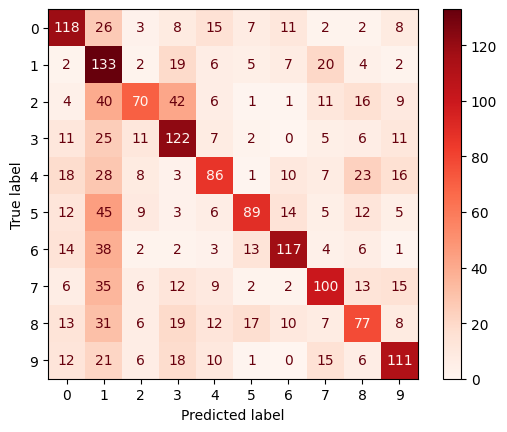

Classification Report:

              precision    recall  f1-score   support

           0       0.56      0.59      0.58       200
           1       0.32      0.67      0.43       200
           2       0.57      0.35      0.43       200
           3       0.49      0.61      0.54       200
           4       0.54      0.43      0.48       200
           5       0.64      0.45      0.53       200
           6       0.68      0.58      0.63       200
           7       0.57      0.50      0.53       200
           8       0.47      0.39      0.42       200
           9       0.60      0.56      0.58       200

    accuracy                           0.51      2000
   macro avg       0.54      0.51      0.51      2000
weighted avg       0.54      0.51      0.51      2000



In [6]:

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')
plt.show()

print("Classification Report:\n")
print(classification_report(y_test, y_test_pred))


## 4. Gaussian Naive Bayes with PCA

In [7]:

Pipeline_GNB = Pipeline([
    ('pca', PCA(n_components=0.80)),
    ('gnb', GaussianNB())
])

Pipeline_GNB.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('pca', ...), ('gnb', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"n_components n_components: int, float or 'mle', default=NoneNumber of components to keep.if n_components is not set all components are kept:: n_components == min(n_samples, n_features)If ``n_components == 'mle'`` and ``svd_solver == 'full'``, Minka'sMLE is used to guess the dimension. Use of ``n_components == 'mle'``will interpret ``svd_solver == 'auto'`` as ``svd_solver == 'full'``.If ``0 < n_components < 1`` and ``svd_solver == 'full'``, select thenumber of components such that the amount of variance that needs to beexplained is greater than the percentage specified by n_components.If ``svd_solver == 'arpack'``, the number of components must bestrictly less than the minimum of n_features and n_samples.Hence, the None case results in:: n_components == min(n_samples, n_features) - 1",0.8
,"copy copy: bool, default=TrueIf False, data passed to fit are overwritten and runningfit(X).transform(X) will not yield the expected results,use fit_transform(X) instead.",True
,"whiten whiten: bool, default=FalseWhen True (False by default) the `components_` vectors are multipliedby the square root of n_samples and then divided by the singular valuesto ensure uncorrelated outputs with unit component-wise variances.Whitening will remove some information from the transformed signal(the relative variance scales of the components) but can sometimeimprove the predictive accuracy of the downstream estimators bymaking their data respect some hard-wired assumptions.",False
,"svd_solver svd_solver: {'auto', 'full', 'covariance_eigh', 'arpack', 'randomized'}, default='auto'""auto"" : The solver is selected by a default 'auto' policy is based on `X.shape` and `n_components`: if the input data has fewer than 1000 features and more than 10 times as many samples, then the ""covariance_eigh"" solver is used. Otherwise, if the input data is larger than 500x500 and the number of components to extract is lower than 80% of the smallest dimension of the data, then the more efficient ""randomized"" method is selected. Otherwise the exact ""full"" SVD is computed and optionally truncated afterwards.""full"" : Run exact full SVD calling the standard LAPACK solver via `scipy.lina

### Accuracy After PCA

In [8]:

y_test_pca = Pipeline_GNB.predict(X_test)

train_acc_pca = accuracy_score(y_train, Pipeline_GNB.predict(X_train))
test_acc_pca  = accuracy_score(y_test, y_test_pca)

print(f"Train Score: {train_acc_pca*100:.2f}%")
print(f"Test  Score: {test_acc_pca*100:.2f}%")


Train Score: 63.52%
Test  Score: 63.20%


## 5. Evaluation (After PCA)

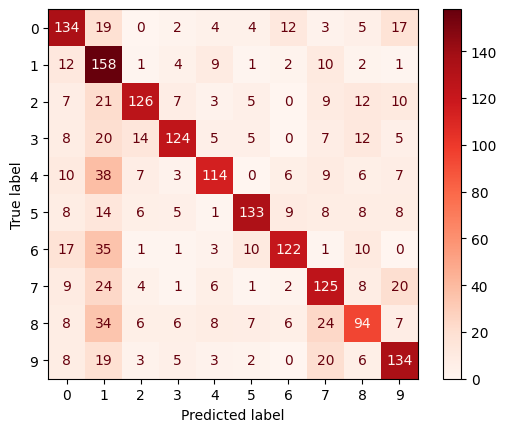

Classification Report:

              precision    recall  f1-score   support

           0       0.61      0.67      0.64       200
           1       0.41      0.79      0.54       200
           2       0.75      0.63      0.68       200
           3       0.78      0.62      0.69       200
           4       0.73      0.57      0.64       200
           5       0.79      0.67      0.72       200
           6       0.77      0.61      0.68       200
           7       0.58      0.62      0.60       200
           8       0.58      0.47      0.52       200
           9       0.64      0.67      0.66       200

    accuracy                           0.63      2000
   macro avg       0.66      0.63      0.64      2000
weighted avg       0.66      0.63      0.64      2000



In [9]:

cm = confusion_matrix(y_test, y_test_pca)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')
plt.show()

print("Classification Report:\n")
print(classification_report(y_test, y_test_pca))


## 6. Cross-Validation (GaussianNB + PCA)

In [13]:
# Combine training and test sets for cross-validation
X_flat = np.vstack([X_train, X_test])
y = np.hstack([y_train, y_test])

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv = cross_validate(
    Pipeline_GNB,
    X_flat,
    y,
    scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'],
    cv=kf,
    return_train_score=True,
    n_jobs=-1
)


## 7. Cross-Validation Results

In [14]:

print("Accuracy:")
print(f"Train Accuracy: {cv['train_accuracy'].mean()*100:.2f}%")
print(f"Test  Accuracy: {cv['test_accuracy'].mean()*100:.2f}%\n")

print("Precision:")
print(f"Test Precision: {cv['test_precision_weighted'].mean()*100:.2f}%\n")

print("Recall:")
print(f"Test Recall: {cv['test_recall_weighted'].mean()*100:.2f}%\n")

print("F1 Score:")
print(f"Test F1 Score: {cv['test_f1_weighted'].mean()*100:.2f}%")


Accuracy:
Train Accuracy: 63.96%
Test  Accuracy: 62.84%

Precision:
Test Precision: 66.68%

Recall:
Test Recall: 62.84%

F1 Score:
Test F1 Score: 63.55%


## 8. Training Time Analysis

In [15]:

fit_times = cv['fit_time']
print("Training Times per fold:", fit_times)
print("Mean Training Time:", fit_times.mean())
print("Std Training Time:", fit_times.std())


Training Times per fold: [0.76216412 0.76539326 0.7298975  0.75855899 0.76785183]
Mean Training Time: 0.7567731380462647
Std Training Time: 0.013795620552611897
